# Authentication

In [1]:
#This step is used to import praw
import praw

#This step is used to authenticate the user
user_agent = "Reddit_Scrapper 1.0 by /u/Similar_Annual7584"
reddit = praw.Reddit(
    client_id="YXF5BKUD0AKVEOgtVk5z1A",
    
    client_secret="2JyljUUhgT6ztr_O1vQh8XHQ28jqMg",
    
    user_agent=user_agent
)

In [2]:
import pandas as pd
import numpy as np
import re

# Getting trending topic from reddit
# I have used the "Cyberpunk" subreddit channel

In [3]:
#This step uses the "Cyberpunk" subreddit channel
headlines = set()
for submission in reddit.subreddit("Cyberpunk").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Reminder - NO 2077 or Edgerunners related posts. Post them over at r/cyberpunkgame instead.
xxwqgy
colacube
1665142451.0
953
0.97
https://www.reddit.com/r/Cyberpunk/comments/xxwqgy/reminder_no_2077_or_edgerunners_related_posts/
0


# Getting total comments in subreddit

In [4]:
#This step is used to get total comments in subreddit
headlines = set()
for submission in reddit.subreddit("Cyberpunk").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

872


# Creating Dataframe

In [5]:
#Create a dataframe from the scrapped data 
cyberpunk_df = pd.DataFrame(headlines)
cyberpunk_df.head()

,0
0,Feels pretty cyberpunk dystopian to have ad bo...
1,You can now buy a flame-throwing robot dog for...
2,Neuromancer & Snow Crash
3,What is your best cyberpunk anime movies/serie...
4,"Testing out Lora's new ability, Time Warp - sl..."


In [6]:
cyberpunk_df.head()

,0
0,Feels pretty cyberpunk dystopian to have ad bo...
1,You can now buy a flame-throwing robot dog for...
2,Neuromancer & Snow Crash
3,What is your best cyberpunk anime movies/serie...
4,"Testing out Lora's new ability, Time Warp - sl..."


In [7]:
cyberpunk_df.columns

RangeIndex(start=0, stop=1, step=1)

In [8]:
#This step is used to rename the column name to Titles
cyberpunk_df.columns = ['Titles']

In [9]:
cyberpunk_df.head()

,Titles
0,Feels pretty cyberpunk dystopian to have ad bo...
1,You can now buy a flame-throwing robot dog for...
2,Neuromancer & Snow Crash
3,What is your best cyberpunk anime movies/serie...
4,"Testing out Lora's new ability, Time Warp - sl..."


In [10]:
cyberpunk_df.Titles.duplicated().sum() 

0

# Cleaning the Text

In [11]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
cyberpunk_df["Titles"]= cyberpunk_df["Titles"].apply(cleanTxt)

#Show the clean text
cyberpunk_df.head()

,Titles
0,Feels pretty cyberpunk dystopian to have ad bo...
1,You can now buy a flame-throwing robot dog for...
2,Neuromancer & Snow Crash
3,What is your best cyberpunk anime movies/serie...
4,"Testing out Lora's new ability, Time Warp - sl..."


# Removing the emoji and Unicode

In [12]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
cyberpunk_df["Titles"]= cyberpunk_df["Titles"].apply(remove_emoji)

#Show the clean text
cyberpunk_df.head()

,Titles
0,Feels pretty cyberpunk dystopian to have ad bo...
1,You can now buy a flame-throwing robot dog for...
2,Neuromancer & Snow Crash
3,What is your best cyberpunk anime movies/serie...
4,"Testing out Lora's new ability, Time Warp - sl..."


In [13]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

# Creating functions for subjectivity and polarity

In [14]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
cyberpunk_df['Subjectivity'] = cyberpunk_df['Titles'].apply(getSubjectivity)
cyberpunk_df['Polarity'] = cyberpunk_df['Titles'].apply(getPolarity)

#Now display data
cyberpunk_df.head()

,Titles,Subjectivity,Polarity
0,Feels pretty cyberpunk dystopian to have ad bo...,1.000000,0.250000
1,You can now buy a flame-throwing robot dog for...,0.000000,0.000000
2,Neuromancer & Snow Crash,0.000000,0.000000
3,What is your best cyberpunk anime movies/serie...,0.273737,0.390152
4,"Testing out Lora's new ability, Time Warp - sl...",0.381145,-0.106397


# Grouping the range of polarity to three categories

In [15]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
cyberpunk_df["Insight"] = cyberpunk_df["Polarity"].apply(getInsight)

cyberpunk_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Feels pretty cyberpunk dystopian to have ad bo...,1.000000,0.250000,Positive
1,You can now buy a flame-throwing robot dog for...,0.000000,0.000000,Neutral
2,Neuromancer & Snow Crash,0.000000,0.000000,Neutral
3,What is your best cyberpunk anime movies/serie...,0.273737,0.390152,Positive
4,"Testing out Lora's new ability, Time Warp - sl...",0.381145,-0.106397,Negative
5,Megabuilding H13,0.000000,0.000000,Neutral
6,I asked this in the comments of a post the oth...,0.481250,0.018750,Positive
7,Cool open source AI project from UAE,0.575000,0.175000,Positive
8,"""Junk""—a short story by May Haddad ()",0.300000,0.000000,Neutral
9,"Hudson""s M314 Motion Tracker",0.000000,0.000000,Neutral


# Plotting seaborn plot

In [16]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

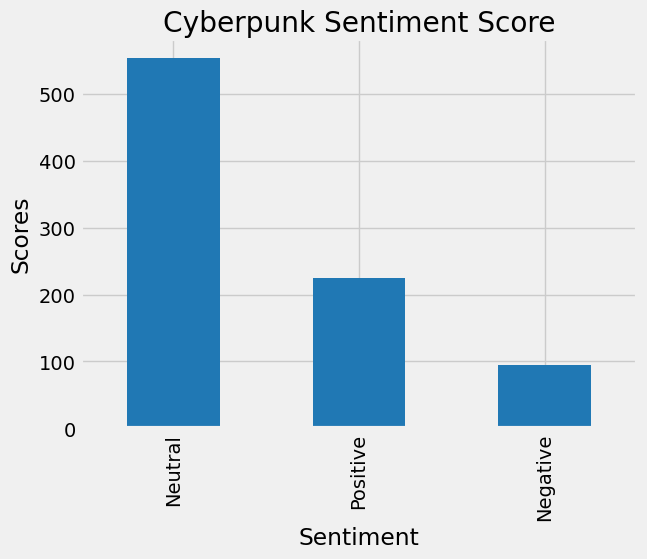

In [17]:
#Plot the values count of sentiment
plt.title("Cyberpunk Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
cyberpunk_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Plotting the Word Cloud

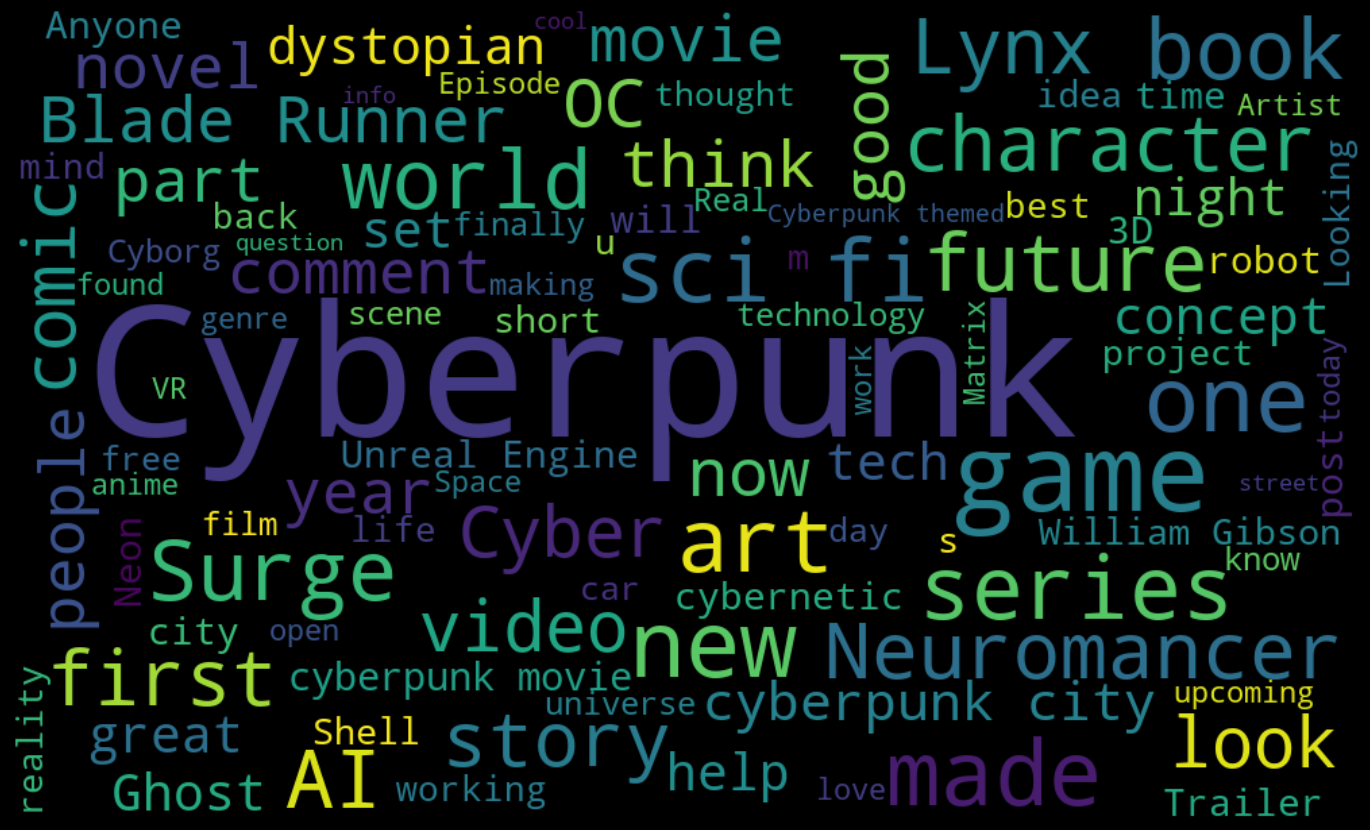

In [18]:
text = ' '.join( [twts for twts in cyberpunk_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");